In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
X=dataset.iloc[:,[3,4]].values

In [6]:
from sklearn.cluster import AffinityPropagation
affp = AffinityPropagation()
label=affp.fit_predict(X)

In [7]:
cluster_centers_indices = affp.cluster_centers_indices_
labels = affp.labels_

In [8]:
n_clusters = len(cluster_centers_indices)
print("Number of estimated clusters:", n_clusters)


Number of estimated clusters: 11


Text(0, 0.5, 'Spending Score')

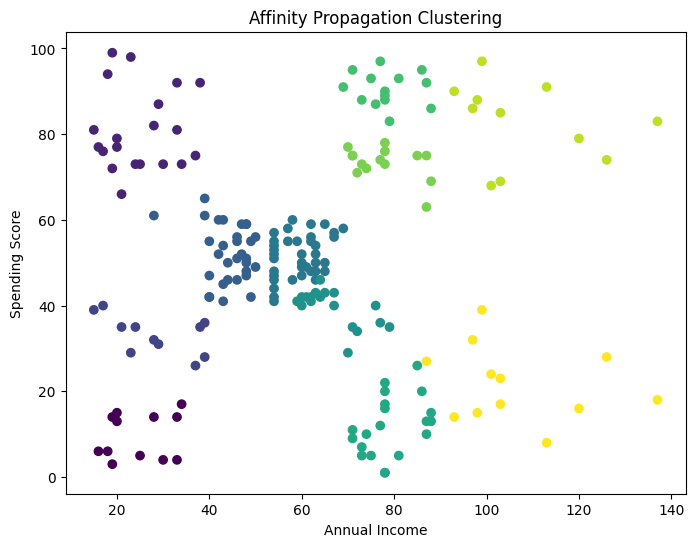

In [9]:
#Plot the clusters
#Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [10]:
#Plot the cluster centers
centroids=affp.cluster_centers_

In [11]:
centroids

array([[ 25,   5],
       [ 28,  82],
       [ 28,  32],
       [ 46,  51],
       [ 60,  52],
       [ 67,  40],
       [ 77,  12],
       [ 78,  90],
       [ 78,  73],
       [103,  85],
       [103,  23]], dtype=int64)

In [12]:
supervised=pd.DataFrame(dataset)

In [13]:
supervised["cluster_group"]=labels

In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


In [15]:
supervised.to_csv("clusters.csv",index=False)